# HOMEWORK 2 - CONSTRUCTING AND ANALYZING LAPLACE TRANSFORMS FOR REACTION NETWORKS

**COMMENTS**

12/10. Nice work. And you did it in LaTex too!

In this homework, you will construct a Laplace transform for a reaction network and predict its response to initial conditions.

The reaction network you will analyze is:

$S_1 \xrightarrow[\text{}]{k_1 S_1} S_2$,
$S_2 \xrightarrow[\text{}]{k_2 S_2} S_3$,
$S_3 \xrightarrow[\text{}]{k_3 S_3} S_2$,

In your computational studies, use $k_1 = 1$, $k_2 = 2$, $k_3 = 2.5$.
The initial conditions for $S_1 = 5$; all other species are initialized to 0.

You should submit your homework as a collab notebook with a separate section for each question.

**Questions**
1. (1 pt) Write Antimony code for the reaction network and simulate it under initial conditions.
1. (5 pt) Find the transfer function $G(s) = \frac{S_3(s)}{S_1 (s)}$. Show steps: (a) construct system equations; (b) convert to Laplace Transforms; and (c) calculate the transfer function.
You will get two points extra credit if you submit your work in LaTex.
1. (1 pt) What are the poles of $G(s)$? Is the system stable? Does it oscillate?
1. (3 pt) We can interpret the simulation in (1) as a response of the transfer function
to the input signal $S_1 (s) = \frac{5}{s + k_1}$. Show that the predicted value of $S_3$ at time
$\infty$ (the "final value") is consistent with the simulation in (1). (Hint: The final value of the Laplace transform $G(s)$
is $lim_{s\rightarrow 0} s G(s)$.) Why is the final value less than the initial value of $S_1$?

# Preliminaries

In [ ]:
!pip install -q tellurium
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tellurium as te

     |████████████████████████████████| 121 kB 8.0 MB/s 
     |████████████████████████████████| 2.6 MB 48.2 MB/s 
     |████████████████████████████████| 5.0 MB 26.5 MB/s 
     |████████████████████████████████| 54.8 MB 1.2 MB/s 
     |████████████████████████████████| 3.3 MB 49.8 MB/s 
     |████████████████████████████████| 38.1 MB 297 kB/s 
     |████████████████████████████████| 6.8 MB 31.5 MB/s 
     |████████████████████████████████| 2.1 MB 42.4 MB/s 
     |████████████████████████████████| 36.7 MB 97 kB/s 
     |████████████████████████████████| 3.2 MB 48.6 MB/s 
     |████████████████████████████████| 5.6 MB 23.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# Helpful Hints

## LaTex Basics

1. All LaTex appears between dollar signs (``$``)
1. Subscripts: $x_2$
1. Superscript: $x^2$
1. Summation: $\sum_{n=0}^{\infty} e^{nt}$
1. Derivatives: $\dot{x}(t)$
1. Bold: ${\bf A}$
1. Fractions: $\frac{a}{b}$

## Steps in Constructing Lapalce Transforms
1. Specify the input and output for the transfer function.
1. Write the system equations.
1. Convert to Laplace transforms.
1. Solve for the output LT in terms of the input LT and form the ratio.

# Q1: Write Antimony Code for the Reaction Network

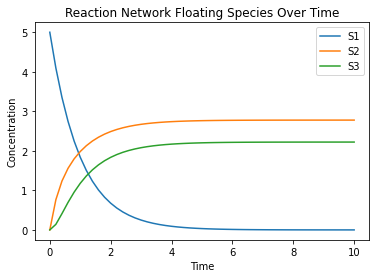

The final value of S3 reached in this simulation is 2.22209272463728


In [ ]:
model = """
S1 -> S2; k1*S1;
S2 -> S3; k2*S2 - k3*S3;

S1 = 5; S2 = 0; S3 = 0;
k1 = 1; k2 = 2; k3 = 2.5;
"""

sys_model = te.loada(model)
data = sys_model.simulate(0, 10)
plt.plot(data[:,0],data[:,1:4])
plt.legend(['S1','S2','S3'])
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Reaction Network Floating Species Over Time')
plt.show()

print("The final value of S3 reached in this simulation is " + str(data[-1,3]))

# Q2: Derive the transfer function $\frac{S_3(s)}{S_1(s)}$

First, we construct the floating species equations from the rate laws and stoichiometry of the reaction network:

$\dot{S1}(t) = -k1*S1$

$\dot{S2}(t) = k1*S1 - k2*S2 + k3*S3$

$\dot{S3}(t) = k2*S2 - k3*S3$

We then take the laplace transforms of these equations and list out the ones that will be needed to find the transfer function.

For this system only the laplace transforms of the $\dot{S2}$ and $\dot{S3}$ equations will be needed:

$s*{S2}(s) = k1*S1(s) - k2*S2(s) + k3*S3(s)$

$s*{S3}(s) = k2*S2(s) - k3*S3(s)$

Since the transfer function we are interested in is the input-output relation for $S1$ to $S3$, we must define the laplace transform of $S2$ in terms of $S1$ or $S3$ so that it can be substituted out.

Defining $S2(s)$ in terms of $S3(s)$:

$s*{S3}(s) = k2*S2(s) - k3*S3(s)$

$s*{S3}(s) + k3*S3(s) = k2*S2(s)$

$(s+k3)*S3(s) = k2*S2(s)$

$\frac{s+k3}{k2}*S3(s) = S2(s)$

We can now calculate the transfer function from the laplace transform of $\dot{S2}$ using the above relationship between $S2(s)$ and $S3(s)$:

$s*{S2}(s) = k1*S1(s) - k2*S2(s) + k3*S3(s)$

$s*{S2}(s) + k2*S2(s) = k1*S1(s) + k3*S3(s)$

$(s+k2)*S2(s) = k1*S1(s) + k3*S3(s)$

$(s+k2)*(\frac{s+k3}{k2}*S3(s)) = k1*S1(s) + k3*S3(s)$

$\frac{(s+k2)*(s+k3)}{k2}*S3(s) - k3*S3(s) = k1*S1(s)$

$(\frac{(s+k2)*(s+k3)}{k2} - k3)*S3(s) = k1*S1(s)$

$(\frac{(s+k2)*(s+k3) -k2*k3}{k2})*\frac{S3(s)}{S1(s)} = k1$

$\frac{S3(s)}{S1(s)} = \frac{k1*k2}{(s+k2)*(s+k3) -k2*k3} = \frac{k1*k2}{s^2+k2*s+k3*s}=G(s)$

# Q3: Poles of the Transfer Function

The poles of this system are $s = 0$ and $s = -(k2+k3)$. Since both $k2$ and $k3$ are positive real numbers, the poles of the system are 0 or negative (in this case, -4.5).

This results in the system being stable (due to no positive poles and at least one negative pole) with no oscillations (due to no imaginary/complex poles).

# Q4: Response to the Input Signal

To determine the value of S3 as $t \rightarrow \infty$, we can apply the final value theorem by taking the transfer function $G(s)$ and calculating $S1_{init}*(lim_{s\rightarrow 0}sG(s))$:

$G(s)=\frac{k1*k2}{s^2+k2*s+k3*s}$

$sG(s)=\frac{k1*k2}{s+k2+k3}$

$lim_{s\rightarrow 0}sG(s)=\frac{k1*k2}{0+k2+k3} = \frac{k1*k2}{k2+k3}$

$S1_{init}*(lim_{s\rightarrow 0}sG(s)) = S1_{init}*\frac{k1*k2}{k2+k3}$

Given that $k1=1$, $k2=2$, $k3=2.5$, and $S1_{init}=5$ in the above simulation, this expression becomes:

$lim_{s\rightarrow 0}sG(s) = 5*\frac{1*2}{2+2.5} = 2.\overline{22}$

This value of $2.\overline{22}$ is consistent with the simulation in Q1, which showed that S3 had reached a value of 2.22209272463728 after 10 seconds of simulation. As the value of S3 was still on a decaying upward trend in the simulation, it is reasonable to expect it to approach $2.\overline{22}$ as time increases beyond the simulation's scope.

This final value for $S3$ is significantly lower than the initial value for $S1$. This is because the reaction from $S2$ to $S3$ is reversible, and its rate in either direction is proportional to the concentration of the chemical species being converted. This naturally results in an equilibrium being reached between $S2$ and $S3$ in the absence of outside forces. For this reason, not all the concentration of $S1$ is converted to $S3$, and the final value of $S3$ ends up being significantly lower than 5.